In [1]:
import pickle
import pandas as pd
import numpy as np
import copy

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("PuBuGn_d")
plt.rc('font', size=13)      

sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/smc_sampler_functions/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/help/")
#import smc_sampler_functions.proposal_kernels
#path = os.getcwd()
#path = path.replace("/ipython_notebooks","")
#path = "/media/alex/Transcend/hsmc/"
path = "/scratch/alexander/hsmc/"
#path = "/home/alex/inter_simulation_results/hsmc_harvard/results_simulation_binary"
#path = "/media/alex/Transcend/hsmc/"

path_logit = path+'results_simulation_logistic'
path_probit = path+'results_simulation_probit'


os.chdir(path)
names_files_list = os.listdir(path)
#print(names_files_list)
#import getsize_function

In [2]:
model_name = 'logit'
dim_list = [61] # 61, 95
dim_len = len(dim_list)
M = 39
names_samplers = ["sampler_HMC_L_random_ours_adaptive_", "sampler_HMC_L_random_ft_adaptive_",
                  "sampler_MALA_", "sampler_RW_"]
names_prop = ['HMCAPR', 'HMCAFT', 'MALA', 'RW']
num_sampler = len(names_samplers)
norm_const_logit = np.zeros((M, num_sampler, dim_len))
norm_const_probit = np.zeros((M, num_sampler, dim_len))
trace_mean_particles_logit = np.zeros((M, num_sampler, dim_len))
trace_mean_particles_probit = np.zeros((M, num_sampler, dim_len))
mean_first_component_particles_logit = np.zeros((M, num_sampler, dim_len))
mean_first_component_particles_probit = np.zeros((M, num_sampler, dim_len))
#trace_var_particles = np.zeros((M, num_sampler, dim_len))
computational_load_logit = np.zeros((M, num_sampler, dim_len))
computational_load_probit = np.zeros((M, num_sampler, dim_len))

steps_logit = np.zeros((M, num_sampler, dim_len))
steps_probit = np.zeros((M, num_sampler, dim_len))


In [3]:
for i_dim, dim in enumerate(dim_list):
    for m_rep in range(M):
        for i, name_sampler in enumerate(names_samplers):
            try: 
                name_to_load_logit = path_logit+"/logistic"+name_sampler+"rep_%s_dim_%s.p"%(m_rep+1, dim)
                name_to_load_probit = path_probit+"/probit"+name_sampler+"rep_%s_dim_%s.p"%(m_rep+1, dim)
                res_dictlogit = pickle.load(open(name_to_load_logit, 'rb'))
                #pd.read_pickle(name_to_load_logit)
                res_dictprobit = pickle.load(open(name_to_load_probit, 'rb'))
                norm_const_logit[m_rep, i, i_dim] = sum(res_dictlogit['Z_list'])
                norm_const_probit[m_rep, i, i_dim] = sum(res_dictprobit['Z_list'])
                trace_mean_particles_logit[m_rep, i, i_dim] = res_dictlogit['particles_resampled'].mean()
                trace_mean_particles_probit[m_rep, i, i_dim] = res_dictprobit['particles_resampled'].mean()

                mean_first_component_particles_logit[m_rep, i, i_dim] = res_dictlogit['particles_resampled'][:,0].mean()
                mean_first_component_particles_probit[m_rep, i, i_dim] = res_dictprobit['particles_resampled'][:,0].mean()

                #trace_var_particles[m_rep, i, i_dim] = res_dict['particles_resampled'].var(axis=1).mean()
                #computational_load_logit[m_rep, i, i_dim] = len(res_dictlogit['temp_list'])* len(res_dictlogit['L_mean'])
                #computational_load_probit[m_rep, i, i_dim] = len(res_dictprobit['temp_list'])* len(res_dictprobit['L_mean'])

                steps_logit[m_rep, i, i_dim] = len(np.unique(res_dictlogit['temp_list']))
                steps_probit[m_rep, i, i_dim] = len(np.unique(res_dictprobit['temp_list']))

                if 'PR' in names_prop[i]:
                    computational_load_logit[m_rep, i, i_dim] = len(res_dictlogit['temp_list'])* res_dictlogit['L_mean'].mean()+(np.unique(res_dictlogit['temp_list'])).shape[0]*res_dictlogit['L_mean'].mean()
                    computational_load_probit[m_rep, i, i_dim] = len(res_dictprobit['temp_list'])* res_dictprobit['L_mean'].mean()+(np.unique(res_dictprobit['temp_list'])).shape[0]*res_dictlogit['L_mean'].mean()

                    #computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()+(np.unique(res_dict['temp_list'])).shape[0]*50
                else: 
                    #computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()
                    computational_load_logit[m_rep, i, i_dim] = len(res_dictlogit['temp_list'])* res_dictlogit['L_mean'].mean()
                    computational_load_probit[m_rep, i, i_dim] = len(res_dictprobit['temp_list'])* res_dictprobit['L_mean'].mean()
            except: 
                pass


            #dict_ess_temp = {'temp': np.unique(res_dict['temp_list']), 'ESS' : res_dict['ESS_list']}
            #list_ess_temp[str(dim)][names_prop[i]].append(dict_ess_temp)

In [4]:
pd.read_pickle(name_to_load_logit)

{'ESJD': [0.13870412813246097,
  0.276110741194199,
  0.06867745877153555,
  0.061084738886088084,
  0.07344781294210936,
  0.0707514991814931],
 'ESS_list': [0.49631769126377845,
  0.4974487766013966,
  0.4915608482431233,
  0.5088388835466044,
  0.9863575213950906,
  0.9999999999999984],
 'L_mean': array([1.]),
 'Z_list': [array(-9.01276486),
  array(-11.77212734),
  array(-14.41246196),
  array(-15.36026927),
  array(-2.1301164),
  array(0.)],
 'acceptance_rate_list': [0.100830078125,
  0.207763671875,
  0.07421875,
  0.0888671875,
  0.1259765625,
  0.144287109375],
 'epsilon_mean': array([0.49684608, 0.29793129, 0.31721377, 0.26151   , 0.21738776,
        0.19856071]),
 'last_L': array([1., 1., 1., ..., 1., 1., 1.]),
 'last_epsilon': array([0.17153729, 0.27672108, 0.1396625 , ..., 0.27146537, 0.16645505,
        0.1692584 ]),
 'mean_list': array([-0.87121367, -0.93675875, -0.200145  ,  0.98923944, -1.01788098,
         0.06802758,  0.07416139,  0.74268863,  0.79200828, -0.90339705,

In [5]:
steps_logit.mean(axis=0), steps_probit.mean(axis=0)

steps_logit
#sum(res_dictlogit2['Z_list'])
computational_load_probit.mean(axis=0)

array([[ 388.15241146],
       [ 351.34347187],
       [2281.84615385],
       [3929.        ]])

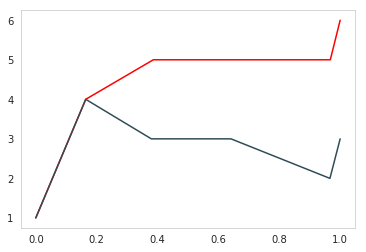

[0.983642578125, 0.985595703125, 0.976318359375, 0.96630859375, 0.954345703125, 0.952392578125] [0.989013671875, 0.986572265625, 0.962646484375, 0.94287109375, 0.91455078125, 0.897216796875]
6 6
[12.10351562 12.41992188 12.50512695 12.54785156 12.68945312 14.3840332 ] [12.61547852 13.48217773 14.7746582  15.53881836 15.97070312 16.25732422]


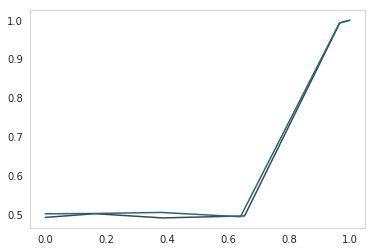

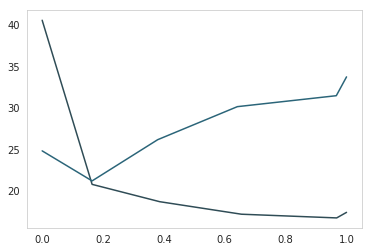

['weights_normalized', 'parameters', 'temp_list', 'epsilon_mean', 'last_epsilon', 'acceptance_rate_list', 'test_dict_list', 'target_name', 'run_time', 'ESS_list', 'last_L', 'particles_resampled', 'proposal_kernel', 'var_list', 'mean_list', 'ESJD', 'L_mean', 'Z_list']


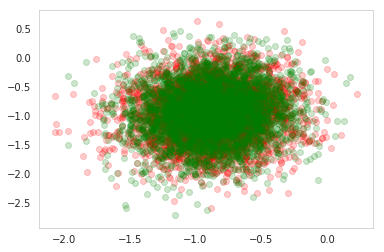

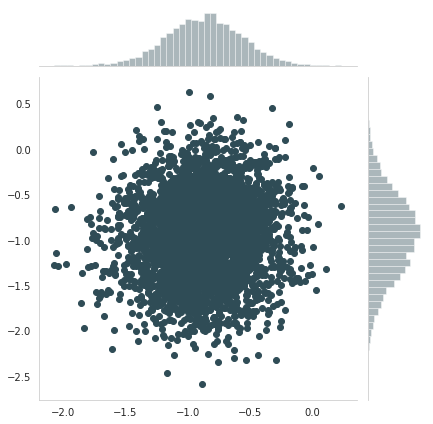

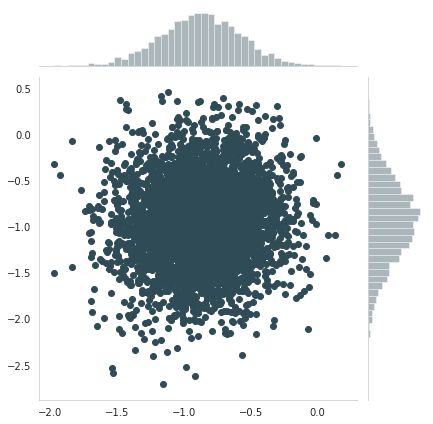

In [6]:
inter = 1
name_to_load_logit = path_logit+"/logistic"+names_samplers[0]+"rep_%s_dim_%s.p"%(inter, dim)
res_dictlogit1 = pickle.load(open(name_to_load_logit, 'rb'))

name_to_load_logit = path_logit+"/logistic"+names_samplers[1]+"rep_%s_dim_%s.p"%(inter, dim)
res_dictlogit2 = pickle.load(open(name_to_load_logit, 'rb'))


steps1, counts1 =  np.unique(res_dictlogit1['temp_list'],  return_counts=True)
steps2, counts2 =  np.unique(res_dictlogit2['temp_list'],  return_counts=True)
plt.plot(steps1, counts1, color="r")
plt.plot(steps2, counts2)
plt.show()
#print a
print res_dictlogit1['acceptance_rate_list'], res_dictlogit2['acceptance_rate_list']
print len(np.unique(res_dictlogit1['temp_list'])), len(np.unique(res_dictlogit2['temp_list']))
print np.unique(res_dictlogit1['L_mean']), np.unique(res_dictlogit2['L_mean'])

plt.plot(np.unique(res_dictlogit1['temp_list']), res_dictlogit1['ESS_list'])
plt.plot(np.unique(res_dictlogit2['temp_list']), res_dictlogit2['ESS_list'])
plt.show()

plt.plot(np.unique(res_dictlogit1['temp_list']), res_dictlogit1['ESJD'])
plt.plot(np.unique(res_dictlogit2['temp_list']), res_dictlogit2['ESJD'])
plt.show()
print res_dictlogit2.keys()

plt.scatter(res_dictlogit1['particles_resampled'][:,0], res_dictlogit1['particles_resampled'][:,1], alpha=0.2, color="r")
plt.scatter(res_dictlogit2['particles_resampled'][:,0], res_dictlogit2['particles_resampled'][:,1], alpha=0.2, color="g")
plt.show()

sns.jointplot(res_dictlogit1['particles_resampled'][:,0], res_dictlogit1['particles_resampled'][:,1])
sns.jointplot(res_dictlogit2['particles_resampled'][:,0], res_dictlogit2['particles_resampled'][:,1])
plt.show()

In [ ]:
computational_load_probit.mean(axis=0), norm_const_probit.var(axis=0)
res_dictlogit['particles_resampled'].shape

In [5]:
norm_const_logit[norm_const_logit==0.] = np.nan
norm_const_probit[norm_const_probit==0.] = np.nan

# remove extrem values
norm_const_logit[norm_const_logit>-10] = np.nan
norm_const_probit[norm_const_probit>-12] = np.nan


trace_mean_particles_logit[trace_mean_particles_logit==0] = np.nan
trace_mean_particles_probit[trace_mean_particles_probit==0] = np.nan

mean_first_component_particles_logit[mean_first_component_particles_logit==0] = np.nan
mean_first_component_particles_probit[mean_first_component_particles_probit==0] = np.nan

norm_const_logit

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


array([[[ -52.5174681 , -128.63087573],
        [ -52.45054778, -112.53947846],
        [ -52.24998781,           nan],
        [ -52.54237117,           nan]],

       [[ -52.53961785, -130.33564419],
        [ -52.35020253, -115.58075507],
        [ -52.53115752,           nan],
        [ -52.54392744,           nan]],

       [[ -52.4838382 , -130.18360241],
        [ -52.44732934, -108.35610394],
        [ -52.4915939 ,           nan],
        [ -52.64811962,           nan]],

       [[ -52.38841728, -129.87557192],
        [ -52.45255759, -116.13616457],
        [ -52.46934338,           nan],
        [ -52.58618233,           nan]],

       [[ -52.76963024, -130.21149641],
        [ -52.50294239, -129.12781227],
        [ -52.47897269,           nan],
        [ -52.65500183,           nan]],

       [[ -52.46860977, -130.27532707],
        [ -52.50092171, -130.02811947],
        [ -52.4975412 ,           nan],
        [ -52.6876725 ,           nan]],

       [[ -52.45709239, -130

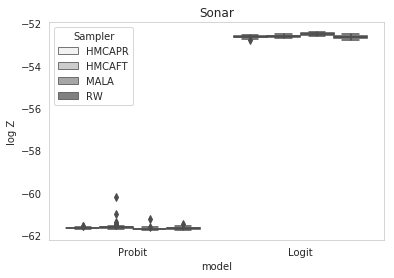

IndexError: index 1 is out of bounds for axis 2 with size 1

In [7]:

index_dim = 1
def plot_comparision(logit_arrary, probit_arry, index_dim, variable='Log normconst', y_label_in='log Z', filter_list=None):
    df_norm_const_logit = pd.DataFrame(logit_arrary[:,:,index_dim])
    df_norm_const_logit.columns = names_prop
    df_norm_const_logit['dim'] = dim_list[index_dim]
    df_norm_const_logit['type'] = 'Logit'
    df_norm_const_logit = pd.melt(df_norm_const_logit, id_vars=['dim', 'type'])

    df_norm_const_probit = pd.DataFrame(probit_arry[:,:,index_dim])
    df_norm_const_probit.columns = names_prop
    df_norm_const_probit['dim'] = dim_list[index_dim]
    df_norm_const_probit['type'] = 'Probit'
    df_norm_const_probit = pd.melt(df_norm_const_probit, id_vars=['dim', 'type'])

    df_norm_const_all = pd.concat([df_norm_const_probit, df_norm_const_logit])

    df_norm_const_all.columns = ['Dim', 'Model', 'Sampler', variable]
    if filter_list is not None: 
        sns.boxplot(x='Model', y=variable, hue="Sampler", data=df_norm_const_all[df_norm_const_all['Sampler'].isin(filter_list)], color= "gray")
    else: 
        sns.boxplot(x='Model', y=variable, hue="Sampler", data=df_norm_const_all, color= "gray")
    plt.xlabel("model"); plt.ylabel(y_label_in)
    if dim_list[index_dim]==61:
        plt.title('Sonar')
    elif dim_list[index_dim]==95: 
        plt.title('Musk')
    else:
        plt.title('Dimension '+str(dim_list[index_dim]))
    plt.savefig('comparison_binary_dim_'+str(dim_list[index_dim])+'_'+variable+'.pdf')
    plt.show()

plot_comparision(norm_const_logit, norm_const_probit, 0, variable='Log_Normconst', y_label_in='log Z')
plot_comparision(norm_const_logit, norm_const_probit, 1, variable='Log_Normconst', y_label_in='log Z', filter_list=['HMCAPR', 'HMCAFT'])
#plot_comparision(norm_const_logit, norm_const_probit, 2, variable='Log_Normconst')


plot_comparision(trace_mean_particles_logit, trace_mean_particles_probit, 0, variable='Trace_mean', y_label_in='trace mean')
plot_comparision(trace_mean_particles_logit, trace_mean_particles_probit, 1, variable='Trace_mean', y_label_in='trace mean', filter_list=['HMCAPR', 'HMCAFT'])
#plot_comparision(trace_mean_particles_logit, trace_mean_particles_probit, 2, variable='Trace_mean')

plot_comparision(mean_first_component_particles_logit, mean_first_component_particles_probit, 0, variable='mean_first_comp', y_label_in='mean X1')
plot_comparision(mean_first_component_particles_logit, mean_first_component_particles_probit, 1, variable='mean_first_comp', y_label_in='mean X1', filter_list=['HMCAPR', 'HMCAFT'])
#plot_comparision(mean_first_component_particles_logit, mean_first_component_particles_probit, 2, variable='mean_first_comp')


In [ ]:
os.getcwd()


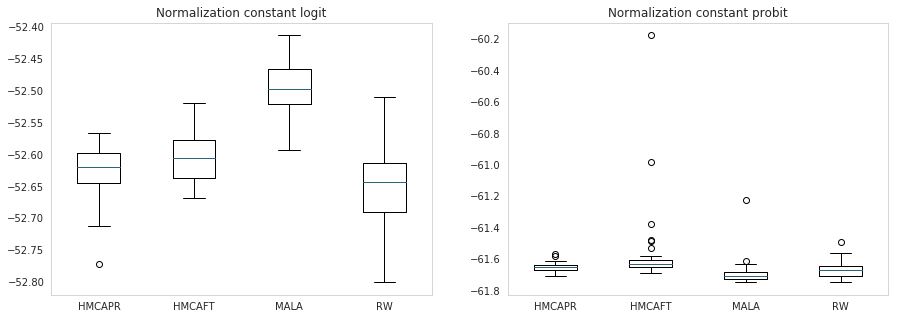

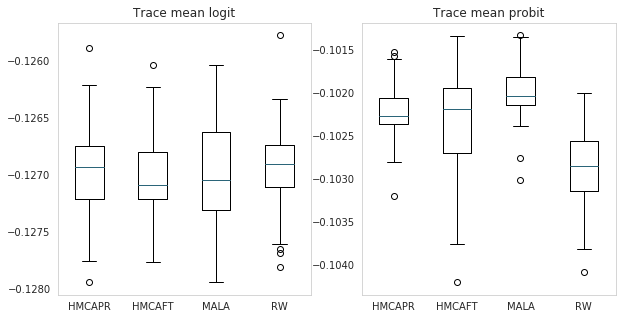

In [8]:
samp_max = 4
y_max = np.max([norm_const_logit[:,:samp_max,0].max(), norm_const_probit[:,:samp_max,0].max()])
y_min = np.min([norm_const_logit[:,:samp_max,0].min(), norm_const_probit[:,:samp_max,0].min()])
plt.figure(figsize=(15,5))

plt.subplot(121)
#plt.ylim(ymin=y_min, ymax=y_max)
plt.title('Normalization constant logit')
plt.boxplot(norm_const_logit[:,:samp_max,0], labels=names_prop[:samp_max])
#plt.yscale('symlog')

plt.subplot(122)
#plt.ylim(ymin=y_min, ymax=y_max)
plt.title('Normalization constant probit')
plt.boxplot(norm_const_probit[:,:samp_max,0], labels=names_prop[:samp_max])
#plt.yscale('symlog')

#; plt.yscale('log')
plt.savefig('norm_const_binary_dim_%s.png'%dim); 
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Trace mean logit')
plt.boxplot(trace_mean_particles_logit[:,:,0], labels=names_prop)

plt.subplot(122)
plt.title('Trace mean probit')
plt.boxplot(trace_mean_particles_probit[:,:,0], labels=names_prop)

#; plt.yscale('log')
#plt.savefig('norm_const_student_dim_%s.png'%dim); 
plt.show()
    

In [13]:
from tabulate import tabulate
from scipy.stats import iqr
#logit_var_comp = (np.nanmedian(computational_load_logit, axis=0)*np.nanvar(norm_const_logit, axis=0))
logit_var_comp = (np.nanmedian(computational_load_logit, axis=0)*iqr(norm_const_logit, axis=0, nan_policy='omit'))
logit_var_comp = np.round(logit_var_comp/logit_var_comp[0,:], decimals=3)
#probit_var_comp =  (np.nanmedian(computational_load_probit, axis=0)*np.nanvar(norm_const_probit, axis=0))
probit_var_comp =  (np.nanmedian(computational_load_probit, axis=0)*iqr(norm_const_probit, axis=0, nan_policy='omit'))
probit_var_comp = np.round(probit_var_comp/probit_var_comp[0,:], decimals=3)
data_list1 = np.hstack((logit_var_comp[:,0], probit_var_comp[:,0])).tolist()
#data_list2 = np.hstack((logit_var_comp[:,1], probit_var_comp[:,1])).tolist()
#data_list3 = np.hstack((logit_var_comp[:,2], probit_var_comp[:,2])).tolist()

first_line = ['Dim']+names_prop+names_prop
second_line = [dim_list[0]]+data_list1
#third_line = [dim_list[1]]+data_list2
#fourth_line = [dim_list[2]]+data_list3
data = [first_line, second_line]#, third_line]#, third_line, fourth_line]
header = ["", 'Logit', 'Probit']
print(tabulate(data, header, tablefmt="latex", floatfmt=".2f"))
#print data_list, columns

\begin{tabular}{lllllllll}
\hline
     &        &        &       &        &        &        & Logit   & Probit   \\
\hline
 Dim & HMCAPR & HMCAFT & MALA  & RW     & HMCAPR & HMCAFT & MALA    & RW       \\
 61  & 1.0    & 0.737  & 3.309 & 20.268 & 1.0    & 1.394  & 7.943   & 22.802   \\
\hline
\end{tabular}


In [15]:
logit_var_comp = np.nanmean(computational_load_logit, axis=0)*np.nanvar(mean_first_component_particles_logit, axis=0)
logit_var_comp = np.round(logit_var_comp/logit_var_comp[0,:], decimals=3)
probit_var_comp =  np.nanmean(computational_load_probit, axis=0)*np.nanvar(mean_first_component_particles_probit, axis=0)
probit_var_comp = np.round(probit_var_comp/probit_var_comp[0,:], decimals=3)
data_list1 = np.hstack((logit_var_comp[:,0], probit_var_comp[:,0])).tolist()
#data_list2 = np.hstack((logit_var_comp[:,1], probit_var_comp[:,1])).tolist()
#data_list3 = np.hstack((logit_var_comp[:,2], probit_var_comp[:,2])).tolist()

first_line = ['Dim']+names_prop+names_prop
second_line = [dim_list[0]]+data_list1
#third_line = [dim_list[1]]+data_list2
#fourth_line = [dim_list[2]]+data_list3
data = [first_line, second_line]#, third_line]#, fourth_line]
header = ["", 'Logit', 'Probit']
print(tabulate(data, header, tablefmt="latex", floatfmt=".2f"))

\begin{tabular}{lllllllll}
\hline
     &        &        &      &        &        &        & Logit   & Probit   \\
\hline
 Dim & HMCAPR & HMCAFT & MALA & RW     & HMCAPR & HMCAFT & MALA    & RW       \\
 61  & 1.0    & 0.729  & 2.9  & 15.775 & 1.0    & 1.278  & 4.84    & 13.718   \\
\hline
\end{tabular}


In [8]:
(computational_load_logit.mean(axis=0)*norm_const_logit.var(axis=0))#.flatten()
#probit_var_comp
#computational_load_logit.shape
#logit_var_comp

array([[0.],
       [0.],
       [0.],
       [0.]])